# Final Project

## Introduction

Health is one of the primary factors of deciding where you wanna live. It is important to make sure the environment you live in makes it easy for you to stay healthy. You don't wanna live in an area where the air quality is bad. You DO wanna live in an area where there is a lot of fast food restaurants, but if you lived in an area where there were a limited amount, you would be forced to stay healthier. Also, you wouldn't wanna live in a place where they dump unnaturally large amounts of toxic waste into the local water streams. All these submetrics will be studied in this project, and will be combined to one "health" metric, that will find the best neighborhood to live in in Allegheny County.

## Air Quality Index - Hamza

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


While searching through the datasets in the wprdc website, I figured that the Allegheny County Air Quality dataset was a good dataset to manipulate and use to come to conclusions. So in this case, I will be finding the neighborhood with the lowest "Air Quality Index" so I can crown it as the healthiest neighborhood to live in in terms of lung health.

Link to dataset used: https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/4ab1e23f-3262-4bd3-adbf-f72f0119108b?inner_span=True

First, lets import the dataset into this notebook.

In [3]:
Air = pd.read_csv("AQI_Data.csv")

To check if it displays properly, I used Air.head

In [4]:
Air.head(10)

,date,site,parameter,index_value,description,health_advisory,health_effects
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
5,2016-01-01,Lincoln,PM10,11,Good,NaN,NaN
6,2016-01-01,South Fayette,SO2,3,Good,NaN,NaN
7,2016-01-01,North Braddock,PM10B,12,Good,NaN,NaN
8,2016-01-01,Parkway East,CO,4,Good,NaN,NaN
9,2016-01-01,Flag Plaza,PM10,7,Good,NaN,NaN


0-50 index is considered Good, 50 - 100 is considered Moderate, 100-130? is considered Unhealthy for sensitive groups

In [5]:
Air['index_value'].mean()

21.731824565193907

The average Air Quality Index Value for all the neighborhoods/sites in Allegheny County is 21.731824565193907.
Anything below that index value is considered better than average air quality relative to the other neigborhoods/sitesin Allegheny County

In [6]:
n = 0
uniq = Air['site'].unique()
for a in uniq:
    n = n + 1
n = str(n)
print("There are " + n + " unique neighborhoods/sites that were recorded")

There are 15 unique neighborhoods/sites that were recorded


We're gonna find out how many times each neighborhood/site was recorded to see if this data can be trusted

In [7]:
AQI = {}
n=0
n1=0
n2=1
for row in Air.iterrows():
    n1 = Air.iloc[n,1] 
    if n1 not in AQI:
        AQI[n1] = n2
    elif n1 in AQI:
        AQI[n1] = AQI[n1] + n2
    n = n+1

AQI

{'Lawrenceville': 4026,
 'Flag Plaza': 4002,
 'Harrison Township': 4806,
 'Avalon': 4054,
 'Lincoln': 3574,
 'South Fayette': 4627,
 'North Braddock': 5763,
 'Parkway East': 7460,
 'Liberty 2': 4906,
 'Lawrenceville 2': 4970,
 'Glassport High Street': 2493,
 'Liberty': 2506,
 'Clairton': 553,
 'West Mifflin': 301,
 'Pittsburgh': 1501}

The most recorded neighborhood/site is Parkway East, while the least recorded neigborhood/site is West Mifflin. West Mifflin was recorded only 301 times, which while being a low number compared to how many times the other sites/neighborhoods were recorded, it is still a substantial amount and should be good enough.

Now, we are gonna add the Air Quality index for each neighborhood/site, then divide by how many times that neighborhood/site has been recorded so we can find the average Air Quality index for said neighborhood/site

In [8]:
Airq = {}
n=0
n1=0
n2=0
for row in Air.iterrows():
    n1 = Air.iloc[n,1]
    n2 = Air.iloc[n,3]
    if n1 not in Airq:
        Airq[n1] = n2
    elif n1 in Airq:
        Airq[n1] = Airq[n1] + n2
    n = n+1




In [9]:
AverageAir = dict((k, float(Airq[k]) / AQI[k]) for k in Airq)
AverageAir



{'Lawrenceville': 38.044212617983106,
 'Flag Plaza': 9.94927536231884,
 'Harrison Township': 24.34082397003745,
 'Avalon': 22.0004933399112,
 'Lincoln': 35.10800223838836,
 'South Fayette': 21.42381672790145,
 'North Braddock': 18.175602984556654,
 'Parkway East': 21.96206434316354,
 'Liberty 2': 32.26335099877701,
 'Lawrenceville 2': 3.081086519114688,
 'Glassport High Street': 17.186522262334538,
 'Liberty': 18.70071827613727,
 'Clairton': 17.81374321880651,
 'West Mifflin': 6.335548172757475,
 'Pittsburgh': 26.397068620919388}

In [10]:
airplot = pd.Series(AverageAir)


In [11]:
airplot

Lawrenceville            38.044213
Flag Plaza                9.949275
Harrison Township        24.340824
Avalon                   22.000493
Lincoln                  35.108002
South Fayette            21.423817
North Braddock           18.175603
Parkway East             21.962064
Liberty 2                32.263351
Lawrenceville 2           3.081087
Glassport High Street    17.186522
Liberty                  18.700718
Clairton                 17.813743
West Mifflin              6.335548
Pittsburgh               26.397069
dtype: float64

Before we proceed, We have to add up Lawrenceville and Lawrenceville 2's Average AQI and divide it by two. This is because there were two measurers placed in Lawrenceville.
Same thing has to be done with Lincoln and Lincoln 2.

In [12]:
law1 = AverageAir["Lawrenceville"]
law2 = AverageAir["Lawrenceville 2"]
average = (law1+law2)/2
AverageAir["Lawrenceville"] = average
del AverageAir["Lawrenceville 2"]


In [13]:
lib1 = AverageAir["Liberty"]
lib2 = AverageAir["Liberty 2"]
averagelib = (lib1+lib2)/2
AverageAir["Liberty"] = average
del AverageAir["Liberty 2"]

In [14]:
AverageAir

{'Lawrenceville': 20.5626495685489,
 'Flag Plaza': 9.94927536231884,
 'Harrison Township': 24.34082397003745,
 'Avalon': 22.0004933399112,
 'Lincoln': 35.10800223838836,
 'South Fayette': 21.42381672790145,
 'North Braddock': 18.175602984556654,
 'Parkway East': 21.96206434316354,
 'Glassport High Street': 17.186522262334538,
 'Liberty': 20.5626495685489,
 'Clairton': 17.81374321880651,
 'West Mifflin': 6.335548172757475,
 'Pittsburgh': 26.397068620919388}

Now, lets find the sites/neighborhoods that have an average AQI below the mean.

In [15]:
new = airplot.drop(airplot.index[9])
new.iloc[0] = average



In [16]:
new1 = new.drop(new.index[8])
new1.iloc[10] = averagelib


In [17]:
goodair = {}
n=0
n1=0
n2=0
mean = Air['index_value'].mean()
value = new1.values
index = new1.index
for item in new1.iteritems():
    if value[n] < mean:
        goodair[index[n]] = value[n]
    n = n + 1
goodair


{'Lawrenceville': 20.5626495685489,
 'Flag Plaza': 9.94927536231884,
 'South Fayette': 21.42381672790145,
 'North Braddock': 18.175602984556654,
 'Glassport High Street': 17.186522262334538,
 'Liberty': 18.70071827613727,
 'West Mifflin': 6.335548172757475}

The sites/neighborhoods with an Air Quality index below the mean of 21.731824565193907 are Flag Plaza, South Fayette, North Braddock, Lawrenceville 2, Glassport High Street, Liberty, Clairton, and West mifflin.

This time we are gonna find the sites/neighborhoods that have an average higher than the mean.

In [18]:
badair = {}
n=0
n1=0
n2=0
mean = Air['index_value'].mean()
value = new1.values
index = new1.index
for item in new1.iteritems():
    if value[n] > mean:
        badair[index[n]] = value[n]
    n = n + 1
badair



{'Harrison Township': 24.34082397003745,
 'Avalon': 22.0004933399112,
 'Lincoln': 35.10800223838836,
 'Parkway East': 21.96206434316354,
 'Clairton': 25.48203463745714,
 'Pittsburgh': 26.397068620919388}

The sites/neighborhoods with an Air Quality Index above the mean of 21.731824565193907 are Lawrenceville, Harrison Township, Avalon, Lincoln, Parkway East, Liberty 2, and Pittsburgh.

Now, its time to single out the site/neighborhood with the lowest average Air Quality Index using some pandas python code.

In [19]:
new1.min()

6.335548172757475

It seems that the lowest Air Quality index is 6.335548172757475. Lets find out what site/neighborhood holds that value

In [20]:
position = new1.argmin()
index = new1.index
index[position]


'West Mifflin'

It turns out West Mifflin has the lowest average Air Quality Index out of all 15 sites/neighborhoods recorded, crowning it the healthiest site/neighborhood to live in in allegheny county in terms of lung health.

Here is a bar graph to visualize this data and compare the site/neighborhoods with eachother easily

Text(0, 0.5, 'Air Quality Index')

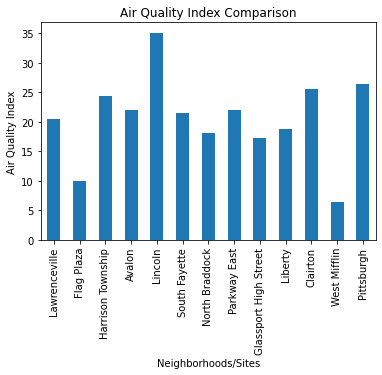

In [21]:
new1.plot(kind='bar')
plt.title("Air Quality Index Comparison")
plt.xlabel("Neighborhoods/Sites")
plt.ylabel("Air Quality Index")

Here is a series that shows the values in order numerically to make more accurate comparisons.

In [22]:
new2 = new1.sort_values()
new2

West Mifflin              6.335548
Flag Plaza                9.949275
Glassport High Street    17.186522
North Braddock           18.175603
Liberty                  18.700718
Lawrenceville            20.562650
South Fayette            21.423817
Parkway East             21.962064
Avalon                   22.000493
Harrison Township        24.340824
Clairton                 25.482035
Pittsburgh               26.397069
Lincoln                  35.108002
dtype: float64

## Fast Food Locations - Christian

In [23]:
import pandas as pd
import numpy as np

For my dataset, I chose Allegheny County Fast Food Establishments. This dataset tracks the location of fast food restaurants across Allegheny County. I will be using this dataset to tally the number of fast food restaurants in each Pittsburgh neighborhood. In this situation, the neighborhood with the fewest fast foot restaurants is the healthiest.

Link to dataset: https://data.wprdc.org/dataset/allegheny-county-fast-food/resource/3c530161-2976-41ae-a0f0-7d3e74835049?view_id=5d1cd55e-ca5f-4020-bb07-b527a2ea67f7

In [24]:
Food = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv")

Here I import the dataset, then display some values so you can get a sense of what the dataset keeps track of

In [25]:
Food.head(10)

,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out
5,Angelia's Pizza,JNG Pizza LLC,5/11/2004,202,Moon Clinton Rd,15108,40.513135,-80.223406,Take Out
6,Angelia's Pizza / Chill Frozen Dessserts,Eaton Pizza Inc,10/7/2005,410,Penn Lincoln Dr,15126,40.442466,-80.235992,Take Out
7,Antney's Ice Cream,The Iceman Inc,4/11/2002,1316,Poplar St,15205,40.427470,-80.052435,"Breakfast, Drink, Other"
8,Arby's,Kinco Inc,1/1/1975,1617,Freeport Rd,15065,40.622125,-79.727516,Dollar Menu
9,Arby's #8,Linell Corporation,12/3/2007,3974,Wm Penn Hwy,15146,40.437988,-79.772845,Dollar Menu


Here, this for loop iterates through the dataset, and counts how many times each zip code shows up. The number of times a zip code shows up is the number of fast food restauraunts in the zip code.

In [26]:
AQI = {}
n=0
n1=0
n2=1
for row in Food.iterrows():
    n1 = Food.iloc[n,5] 
    if n1 not in AQI:
        AQI[n1] = n2
    elif n1 in AQI:
        AQI[n1] = AQI[n1] + n2
    n = n+1

AQI

{15237: 44,
 15219: 27,
 15210: 11,
 15108: 19,
 15126: 1,
 15205: 36,
 15065: 10,
 15146: 51,
 15216: 11,
 15213: 38,
 15017: 19,
 15136: 12,
 15044: 14,
 16046: 3,
 15234: 11,
 15218: 7,
 15147: 7,
 15122: 16,
 15202: 13,
 15239: 9,
 15236: 25,
 15102: 21,
 15131: 9,
 15222: 46,
 15123: 3,
 15231: 11,
 15084: 15,
 15232: 12,
 15241: 15,
 15090: 18,
 15203: 19,
 15238: 18,
 15106: 10,
 15120: 16,
 15137: 13,
 15025: 2,
 15224: 6,
 15220: 15,
 15275: 10,
 15143: 10,
 15217: 20,
 15101: 10,
 15223: 5,
 15071: 3,
 15227: 12,
 15206: 11,
 15282: 1,
 15212: 9,
 15201: 5,
 15221: 12,
 15034: 4,
 15229: 8,
 15235: 22,
 15132: 9,
 15228: 7,
 15211: 2,
 15116: 3,
 15076: 1,
 15145: 2,
 15226: 7,
 15037: 3,
 15140: 1,
 15139: 3,
 15209: 3,
 15208: 1,
 15207: 1,
 15129: 1,
 15215: 4,
 15144: 1,
 15024: 2,
 15110: 2,
 15233: 4,
 15148: 1,
 15003: 1,
 15225: 1,
 15045: 1,
 15056: 2}

Here I had to manually turn zip codes into neighborhoods. I did this beacuse the first data set we used was divided into neighborhoods, so I conformed this dataset to fit into that model for better comparisons of neighborhoods. Also, this dataset covered all of Alleegheny County, while we were focusing on neighorhoods of Pittsburgh.

In [27]:
Lawrenceville = np.array([15201])
FlagPlaza = np.array([15219])
Avalon = np.array([15202])
Lincoln = np.array([15207])
SouthFayette = np.array([15017, 15071, 15031, 15057, 15082, 15142, 15064, 15231])
NorthBraddock = np.array([15104])
ParkwayEast = np.array([15112])
GlassportHighStreet = np.array([15045])
Clairton = np.array([15025])
WestMifflin = np.array([15034, 15236, 15122, 15123, 15207])
# ^The ZIP Codes of each neighborhood

These are some arrays, a dictionary and a list to make processing the data easier

In [28]:
AllLocations = np.array([Lawrenceville, FlagPlaza, Avalon, Lincoln, SouthFayette, NorthBraddock, ParkwayEast, GlassportHighStreet, Clairton, WestMifflin])
# ^array of above arrays
AllLocationsNames = np.array(["Lawrenceville", "Flag Plaza", "Avalon", "Lincoln", "South Fayette", "North Braddock", "Parkway East", "Glassport High Street", "Clairton", "West Mifflin"])
# ^name of each array
TotalLocations = {}
#empty dictionary to display data
zipCodeList = list(AQI.keys())
#all the zip codes in the dataset moved into a list

<ipython-input-28-adea430a7e41>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AllLocations = np.array([Lawrenceville, FlagPlaza, Avalon, Lincoln, SouthFayette, NorthBraddock, ParkwayEast, GlassportHighStreet, Clairton, WestMifflin])


This is a nested loop. The inner loop checks if each zipcode is part of a neighborhood. If a zipcode is part of a neighborhood it adds the number of fast food restaurants in the zip code to the neighborhood total. The outer loop just moves to the next neighborhood so the process can be repeated.

In [29]:
for i in range(len(AllLocations)):
    for j in range(len(zipCodeList)):
        if zipCodeList[j] in AllLocations[i]:
            if AllLocationsNames[i] not in TotalLocations.keys():
                TotalLocations[AllLocationsNames[i]] = AQI[zipCodeList[j]]
            else:
                TotalLocations[AllLocationsNames[i]] += AQI[zipCodeList[j]]

for i in range(len(AllLocationsNames)):
    if AllLocationsNames[i] not in TotalLocations.keys():
        TotalLocations[AllLocationsNames[i]] = 0

dict(sorted(TotalLocations.items(), key=lambda item: item[1]))

{'North Braddock': 0,
 'Parkway East': 0,
 'Lincoln': 1,
 'Glassport High Street': 1,
 'Clairton': 2,
 'Lawrenceville': 5,
 'Avalon': 13,
 'Flag Plaza': 27,
 'South Fayette': 33,
 'West Mifflin': 49}

Here we have a sorted list of each neighborhood and how many fast food restaurants they have. The higher vertically on the list, with a lower integer value is a healthier neighorhood, while lower vertically, with a higher integer value is a less healthy neighorhood. By this metric North Braddock and Parkway East are tied for healthiest neighorhood, while West Miffling stands alone as least healthy.

## Toxic Waste - Nathan

In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


While searching for a data set I found one that quantifies the amount of toxic is released into different enviornments. This is a good data set because it will help findout the most safe city to live in based off of the total toxic that is released. I will be focussing on the amount of toxic in the water and findout where the best place to live is based off of that. 

Link:
https://data.wprdc.org/dataset/toxic-release-inventory/resource/c9baaa77-2dc5-494c-a2ce-f90db9106df2

In [31]:
toxic = pd.read_csv("toxic.csv")

In [32]:
toxic.head(10)

,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,REGION,...,RELEASE_RANGE_CODE,TOTAL_RELEASE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE
0,15122SFTYK650NO,1309207547023,SAFETY-KLEEN SYSTEMS WEST MIFFLIN (WMP),650 NOBLE DR,WEST MIFFLIN,ALLEGHENY,42003,PA,15122,3,...,NaN,NaN,0.0,1,NaN,1,NaN,0,NaN,NaN
1,15025SSCLR400ST,1307205668609,USS-CLAIRTON PLANT,400 STATE ST MS 71,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,2500000.0,2500000.0,0,M1,1,MONONGAHELA RIVER,1,NaN,NaN
2,15201XXNCM34THS,1394080093471,EXXON CO USA PITTSBURGH PLANT,100 35TH ST,PITTSBURGH,ALLEGHENY,42003,PA,15201,3,...,NaN,NaN,0.0,0,NaN,2,NaN,0,NaN,NaN
3,15226MTTHW1315W,1303201613510,MATTHEWS INTERNATIONAL CORP,1315 W LIBERTY AVE,PITTSBURGH,ALLEGHENY,42003,PA,15226,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
4,15051MRCNRSTATE,1395090491388,KINDER MORGAN TRANSMIX CO LLC,918 RT 910,INDIANOLA,ALLEGHENY,42003,PA,15051,3,...,NaN,7.0,7.0,0,O,1,DEER CREEK,1,NaN,NaN
5,15051MRCNRSTATE,1395090491388,KINDER MORGAN TRANSMIX CO LLC,918 RT 910,INDIANOLA,ALLEGHENY,42003,PA,15051,3,...,NaN,NaN,0.0,0,NaN,2,NaN,0,NaN,NaN
6,15017GNRLLMAYER,1301150384737,GE CO. BRIDGEVILLE GLASS PLANT,540 MAYER ST,BRIDGEVILLE,ALLEGHENY,42003,PA,15017,3,...,NaN,23.0,23.0,0,M,1,CHARTIERS CREEK,0,100.0,NaN
7,15025RSTCH400ST,1389035122670,KOPPERS INC CLAIRTON TAR PLANT,300 N STATE ST,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,NaN,0.0,1,NaN,3,NaN,0,NaN,NaN
8,15025RSTCH400ST,1389035122744,KOPPERS INC CLAIRTON TAR PLANT,300 N STATE ST,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,0.0,0.0,0,O,1,PETERS CREEK,0,NaN,NaN
9,15116BLLCH1114W,1392065371407,RANBAR TECHNOLOGY INC,1114 WILLIAM FLINN HWY,GLENSHAW,ALLEGHENY,42003,PA,15116,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN


In [33]:
toxic["TOTAL_RELEASE"].mean()

13395.222815396719

In [34]:
n = 0
uniq = toxic['CITY_NAME'].unique()
for a in uniq:
    n = n + 1
n = str(n)
print("There are " + n + " unique cities that were recorded")

There are 48 unique cities that were recorded


In [35]:
toxicC = {}
n=0
n1=0
n2=1
for row in toxic.iterrows():
    n1 = toxic.iloc[n,4] 
    if n1 not in toxicC:
        toxicC[n1] = n2
    elif n1 in toxicC:
        toxicC[n1] = toxicC[n1] + n2
    n = n+1

toxicC

{'WEST MIFFLIN': 470,
 'CLAIRTON': 1829,
 'PITTSBURGH': 4920,
 'INDIANOLA': 353,
 'BRIDGEVILLE': 737,
 'GLENSHAW': 183,
 'LEETSDALE': 228,
 'BRACKENRIDGE': 531,
 'CARNEGIE': 228,
 'SPRINGDALE': 1371,
 'WEST ELIZABETH': 525,
 'DUQUESNE': 54,
 'CHESWICK': 75,
 'BRADDOCK': 680,
 'TURTLE CREEK': 82,
 'OAKMONT': 185,
 'MONROEVILLE': 108,
 'MUNHALL': 154,
 'MC KEESPORT': 327,
 'SOUTH PARK': 2,
 'CORAOPOLIS': 363,
 'MC KEES ROCKS': 163,
 'SEWICKLEY': 171,
 'CREIGHTON': 113,
 'VERONA': 120,
 'EAST PITTSBURGH': 36,
 'HARWICK': 314,
 'JEFFERSON HILLS': 146,
 'WILMERDING': 78,
 'BAKERSTOWN': 91,
 'OAKDALE': 124,
 'NATRONA HEIGHTS': 172,
 'HOMESTEAD': 46,
 'MC DONALD': 95,
 'HEIDELBERG': 37,
 'BUNOLA': 120,
 'GIBSONIA': 71,
 'MCKEESPORT': 33,
 'SHARPSBURG': 6,
 'TARENTUM': 3,
 'GLASSPORT': 55,
 'CLINTON': 12,
 'RANKIN': 19,
 'LIBERTY BOROUGH': 19,
 'DRAVOSBURG': 7,
 'NEVILLE ISLAND': 5,
 'MONONGAHELA': 1,
 'BLAWNOX': 10}

The most recorded city is very easily Pittsburgh which is recorded almost 5 thousand times. Where as the least recorded are places like Tarentum, Nevile Island, or Monogahela that are not even counted in the double digits. This is a huge range in the number of places recorded however because I will be taking the average later that differences importance will decrease. I would entirely take out these data points but for the sake of finding the best city I think it is necesary to use every single data point that I hae available so I will still be using these cities. At the end if these data points are outliars I will say so then and recognize this as one possible reason. 

In [36]:
import math
toxicA = {}
n=0
n1=0
n2=0
for row in toxic.iterrows():
    n1 = toxic.iloc[n,4]
    n2 = toxic.iloc[n,34]
    if math.isnan(n2):
        n2 = 0
    if n1 not in toxicA:
        toxicA[n1] = n2
    elif n1 in toxicA:
        toxicA[n1] = toxicA[n1] + n2
    n = n+1
toxicA    



{'WEST MIFFLIN': 488905.77999999997,
 'CLAIRTON': 47010225.57000003,
 'PITTSBURGH': 2453163.460000001,
 'INDIANOLA': 1537.5500000000002,
 'BRIDGEVILLE': 5168.189999999999,
 'GLENSHAW': 0.0,
 'LEETSDALE': 54784.14000000001,
 'BRACKENRIDGE': 8437507.0,
 'CARNEGIE': 812.0,
 'SPRINGDALE': 29612.1857,
 'WEST ELIZABETH': 15861.84,
 'DUQUESNE': 0.0,
 'CHESWICK': 0.0,
 'BRADDOCK': 1095193.9900000002,
 'TURTLE CREEK': 0.0,
 'OAKMONT': 524.0,
 'MONROEVILLE': 0.0,
 'MUNHALL': 0,
 'MC KEESPORT': 0.0,
 'SOUTH PARK': 0,
 'CORAOPOLIS': 1438.3000000000002,
 'MC KEES ROCKS': 0.0,
 'SEWICKLEY': 500.0,
 'CREIGHTON': 0.0,
 'VERONA': 0.0,
 'EAST PITTSBURGH': 0,
 'HARWICK': 0,
 'JEFFERSON HILLS': 2.3,
 'WILMERDING': 0.0,
 'BAKERSTOWN': 0.0,
 'OAKDALE': 0,
 'NATRONA HEIGHTS': 0,
 'HOMESTEAD': 110.0,
 'MC DONALD': 0,
 'HEIDELBERG': 0.0,
 'BUNOLA': 0.0,
 'GIBSONIA': 0,
 'MCKEESPORT': 0.0,
 'SHARPSBURG': 0,
 'TARENTUM': 0,
 'GLASSPORT': 0,
 'CLINTON': 0,
 'RANKIN': 0,
 'LIBERTY BOROUGH': 0.0,
 'DRAVOSBURG': 0.0

In [37]:
aveTox = dict((k, float(toxicA[k]) / toxicC[k]) for k in toxicC)




In [38]:
toxPlot = pd.Series(aveTox)


In [39]:
toxPlot

WEST MIFFLIN        1040.225064
CLAIRTON           25702.693040
PITTSBURGH           498.610459
INDIANOLA              4.355666
BRIDGEVILLE            7.012469
GLENSHAW               0.000000
LEETSDALE            240.281316
BRACKENRIDGE       15889.843691
CARNEGIE               3.561404
SPRINGDALE            21.598968
WEST ELIZABETH        30.213029
DUQUESNE               0.000000
CHESWICK               0.000000
BRADDOCK            1610.579397
TURTLE CREEK           0.000000
OAKMONT                2.832432
MONROEVILLE            0.000000
MUNHALL                0.000000
MC KEESPORT            0.000000
SOUTH PARK             0.000000
CORAOPOLIS             3.962259
MC KEES ROCKS          0.000000
SEWICKLEY              2.923977
CREIGHTON              0.000000
VERONA                 0.000000
EAST PITTSBURGH        0.000000
HARWICK                0.000000
JEFFERSON HILLS        0.015753
WILMERDING             0.000000
BAKERSTOWN             0.000000
OAKDALE                0.000000
NATRONA 

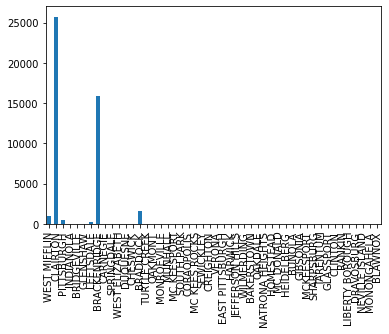

In [40]:
toxPlot.plot(kind = 'bar')

There are too many data points for this graph to be clear, because of this I will remove all the data points with 0 as the result because thats the most common result along with being the goal for this index. Therefore all those with 0 as the result are the cleanest however because of the amount of them I will now be finding the next best city

In [41]:
delete = []
for row in aveTox:
    if aveTox[row] == 0:
        delete.append(row)
for row in delete:
    del aveTox[row]

aveTox

{'WEST MIFFLIN': 1040.2250638297871,
 'CLAIRTON': 25702.693039912538,
 'PITTSBURGH': 498.61045934959367,
 'INDIANOLA': 4.355665722379604,
 'BRIDGEVILLE': 7.012469470827678,
 'LEETSDALE': 240.28131578947372,
 'BRACKENRIDGE': 15889.843691148775,
 'CARNEGIE': 3.56140350877193,
 'SPRINGDALE': 21.598968417213715,
 'WEST ELIZABETH': 30.213028571428573,
 'BRADDOCK': 1610.5793970588238,
 'OAKMONT': 2.8324324324324324,
 'CORAOPOLIS': 3.9622589531680448,
 'SEWICKLEY': 2.9239766081871346,
 'JEFFERSON HILLS': 0.015753424657534244,
 'HOMESTEAD': 2.391304347826087}

In [42]:
toxPlot2 = pd.Series(aveTox)

In [43]:
toxPlot2

WEST MIFFLIN        1040.225064
CLAIRTON           25702.693040
PITTSBURGH           498.610459
INDIANOLA              4.355666
BRIDGEVILLE            7.012469
LEETSDALE            240.281316
BRACKENRIDGE       15889.843691
CARNEGIE               3.561404
SPRINGDALE            21.598968
WEST ELIZABETH        30.213029
BRADDOCK            1610.579397
OAKMONT                2.832432
CORAOPOLIS             3.962259
SEWICKLEY              2.923977
JEFFERSON HILLS        0.015753
HOMESTEAD              2.391304
dtype: float64

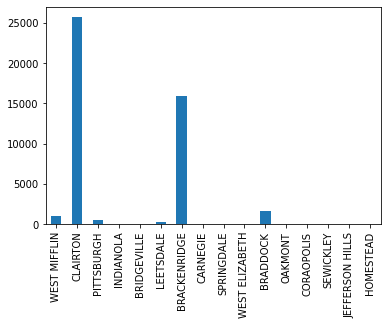

In [44]:
toxPlot2.plot(kind = 'bar')

Because of these two massive outliars its skewing the graph massively making most of the other data points look like nothing. These two data points are also the only two data points above the average therefore they are obviously not the best in the amount of toxic released

In [45]:
del aveTox['CLAIRTON']
del aveTox['BRACKENRIDGE']

In [46]:
aveTox

{'WEST MIFFLIN': 1040.2250638297871,
 'PITTSBURGH': 498.61045934959367,
 'INDIANOLA': 4.355665722379604,
 'BRIDGEVILLE': 7.012469470827678,
 'LEETSDALE': 240.28131578947372,
 'CARNEGIE': 3.56140350877193,
 'SPRINGDALE': 21.598968417213715,
 'WEST ELIZABETH': 30.213028571428573,
 'BRADDOCK': 1610.5793970588238,
 'OAKMONT': 2.8324324324324324,
 'CORAOPOLIS': 3.9622589531680448,
 'SEWICKLEY': 2.9239766081871346,
 'JEFFERSON HILLS': 0.015753424657534244,
 'HOMESTEAD': 2.391304347826087}

In [47]:
toxPlot3 = pd.Series(aveTox)

In [48]:
toxPlot3

WEST MIFFLIN       1040.225064
PITTSBURGH          498.610459
INDIANOLA             4.355666
BRIDGEVILLE           7.012469
LEETSDALE           240.281316
CARNEGIE              3.561404
SPRINGDALE           21.598968
WEST ELIZABETH       30.213029
BRADDOCK           1610.579397
OAKMONT               2.832432
CORAOPOLIS            3.962259
SEWICKLEY             2.923977
JEFFERSON HILLS       0.015753
HOMESTEAD             2.391304
dtype: float64

Text(0, 0.5, 'Total Released on ')

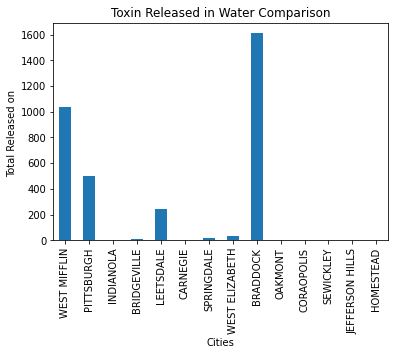

In [49]:
toxPlot3.plot(kind = 'bar')
plt.title("Toxin Released in Water Comparison")
plt.xlabel("Cities")
plt.ylabel("Total Released on ")

## Combining the Submetrics

The only neighborhoods that appear in all of our datasets are West Mifflin, Clairton, and Braddock. We are gonna take the average rank of those three neighborhoods across our three datasets, and the highest ranks is crowned the healthiest neighborhood to live in.

For the Air Quality Index, here are the rankings: 1. West Mifflin, 2. Braddock, 8. Clairton

For the Fast Food Locations, here are the rankings: 1. Braddock, 3. Clairton, 7. West Mifflin

For the Toxic Waste Dumped, here are the rankings: 14. West Mifflin, 15. Braddock, 16. Clairton

West Mifflin scored an average 7.333 rank

Braddock scored an average 6 rank

Clairton scored an average 9 rank

Braddock scored the highest average rank across all three of our metrics, crowning it as the healthiest neighborhood to live in in allegheny county.

Honorable mention:
Jefferson Hills had the lowest amount of toxic waste dumped into the water in Allegheny County. This Neighborhood could have had a chance at winning if it appeared in the other two datasets.


# Conclusion

Hamza (Air Quality Index) - First of all, I wasn't surprised that pittsburgh was one of the worst places to live in regarding Air Quality. It was known as the "steel city" after all. All of those factories contributed to making the air in this area overall bad. As to the other side of the spectrum, I've never been to West Mifflin so I can't say I would wanna live there just based of it having the best air quality, but that is definitely something to take note of when thinking of that neighborhood.

Christian (Fast Food Locations) - According to the data in the bar graph, the best neighborhoods to live in based on my metric were Braddock and Parkway Easy, each with no fast food restaurants. In this situation Lincoln is the honorable mention with only one fast food restaurant. These neighborhoods rank highly on my metric because they have a low number of fast food restaurants. If there are less fast food restaurants near you, you are less likely to go to one, and therefore more likely to make a healthy eating decision. In my personal opinion, I would prefer the opposite. I’m not someone tempted by fast food restaurants, and I only eat fast food on occasion. Because I don’t frequent fast food restaurants, when I do go to one I want there to be many options near me. Therefore my personal favorite neighborhood is West Mifflin with forty nine fast food restaurants. My logic here is that more fast food restaurants means more diversity, and therefore more options.

Nathan (Toxic Waste Dumped) - After eliminating the cities with an average of 0 because of the lack of data points it leaves us with only 16 cities left. Out of these 16 cities Jefferson Hills is easily has the cleanest water with only 0.016 pounds of toxic materials going into their water with significantly less than the second cleanest in Homestead that has 2.39 pounds